# Data Visualization

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

%matplotlib inline

training_data = pd.read_csv('C:/Users/jatin/Downloads/titanic/titanic/train.csv')
test_data = pd.read_csv('C:/Users/jatin/Downloads/titanic/titanic/train.csv')
p_id = test_data['PassengerId']
data = pd.concat([training_data, test_data])


In [27]:
print(data.describe())
data.info()


       PassengerId     Survived       Pclass          Age        SibSp  \
count  1782.000000  1782.000000  1782.000000  1428.000000  1782.000000   
mean    446.000000     0.383838     2.308642    29.699118     0.523008   
std     257.281582     0.486456     0.835836    14.521407     1.102434   
min       1.000000     0.000000     1.000000     0.420000     0.000000   
25%     223.250000     0.000000     2.000000    20.000000     0.000000   
50%     446.000000     0.000000     3.000000    28.000000     0.000000   
75%     668.750000     1.000000     3.000000    38.000000     1.000000   
max     891.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1782.000000  1782.000000  
mean      0.381594    32.204208  
std       0.805831    49.679476  
min       0.000000     0.000000  
25%       0.000000     7.903100  
50%       0.000000    14.454200  
75%       0.000000    31.000000  
max       6.000000   512.329200  
<class 'pandas.core.frame.D

In [28]:
import warnings
warnings.simplefilter('ignore')

In [29]:
#a comprehensive look at the mssing values
totalmissingdata = data.isnull().sum().sort_values(ascending=False)
percentmissingdata = data.isnull().sum()/data.isnull().count()*100
missing_data = pd.concat([totalmissingdata, percentmissingdata], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,1374,77.104377
Age,354,19.865320
Embarked,4,0.224467
Fare,0,0.000000
Ticket,0,0.000000


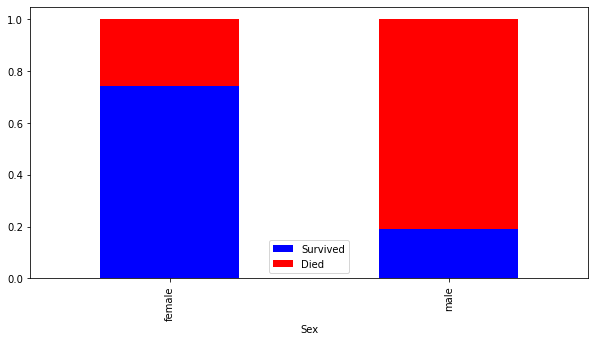

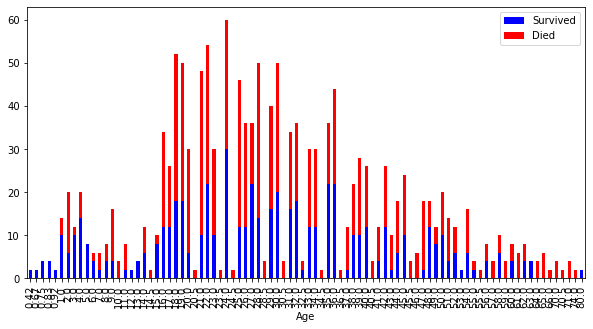

In [30]:

data['Died']=1-data['Survived']
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind= 'bar', figsize=(10, 5), 
                                                           stacked=True, color=['b', 'r'])
data.groupby('Age').agg('sum')[['Survived', 'Died']].plot(kind= 'bar', figsize=(10, 5), 
                                                           stacked=True, color=['b', 'r'])                                                           

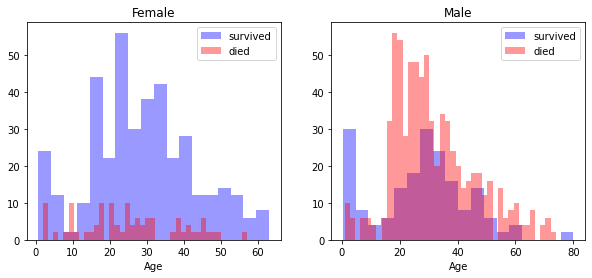

In [31]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False, color= 'b')
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'died', ax = axes[0], kde =False, color='r')
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde = False, color='b')
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'died', ax = axes[1], kde = False, color='r')
ax.legend()
_ = ax.set_title('Male')

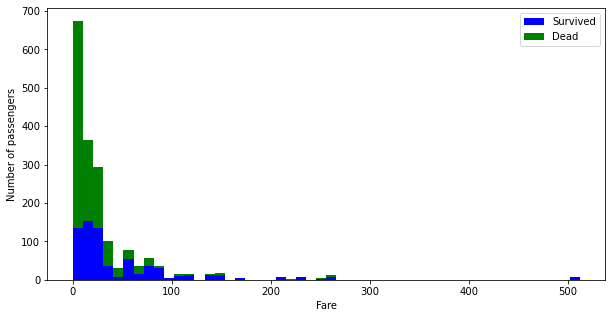

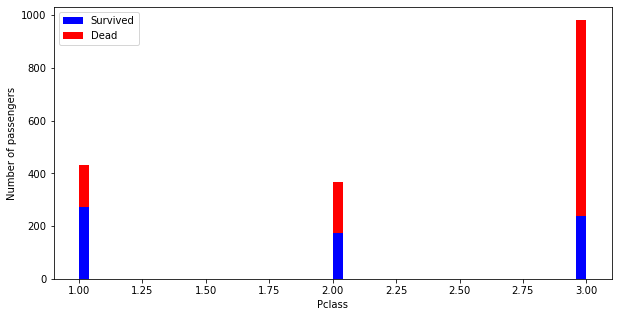

In [32]:
figure = plt.figure(figsize=(10, 5))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['b','g'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

figure1 = plt.figure(figsize=(10, 5))
plt.hist([data[data['Survived'] == 1]['Pclass'], data[data['Survived'] == 0]['Pclass']], 
         stacked=True, color = ['b','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')
plt.legend()

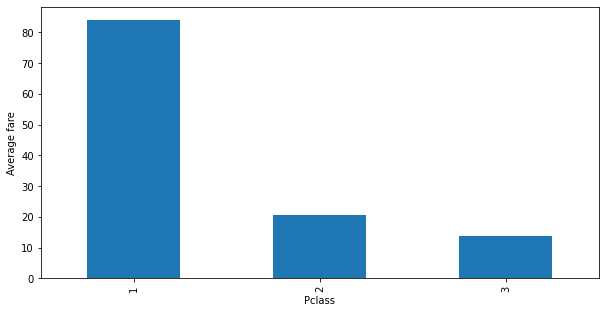

In [33]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(10, 5), ax = ax)

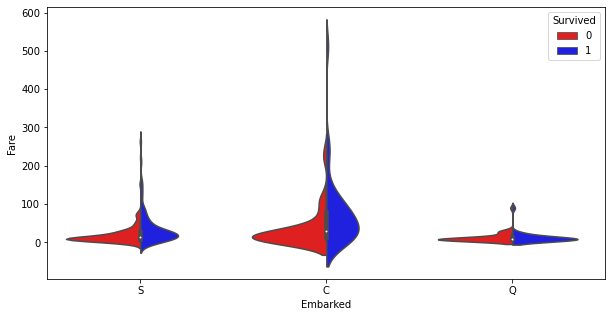

In [34]:
fig = plt.figure(figsize=(10, 5))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "b"});

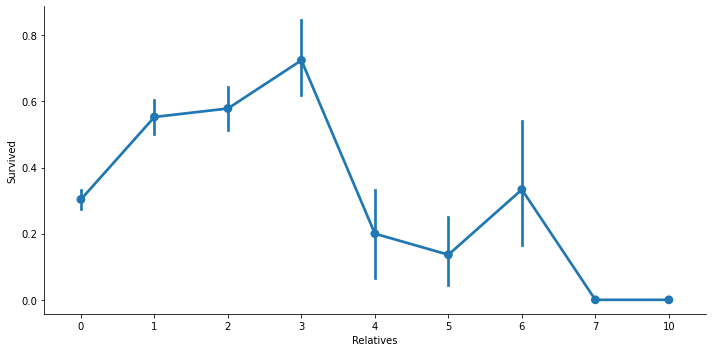

In [35]:
data['Relatives']= data['SibSp']+data['Parch']
data.loc[data['Relatives'] > 0, 'not_alone'] = 0
data.loc[data['Relatives'] == 0, 'not_alone'] = 1
data['not_alone'] = data['not_alone'].astype(int)

axes = sns.factorplot('Relatives','Survived', 
                      data=data, aspect = 2, )

# Data Processing

In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

# Read training  and test data 

In [37]:
df=pd.read_csv('C:/Users/jatin/Downloads/titanic/titanic/train.csv',index_col=0)

In [38]:
df1=pd.read_csv('C:/Users/jatin/Downloads/titanic/titanic/test.csv',index_col=0)

# Train and Test data has 687 and 327 missing values in Cabin

In [39]:
df=df.drop(['Cabin'],axis=1)

In [40]:
df1=df1.drop(['Cabin'],axis=1)


# Since passenger class, embarked location,fare   is given so  Ticket number has no prominent significance.

In [41]:
df=df.drop(['Ticket'],axis=1)
df1=df1.drop(['Ticket'],axis=1)


# Seperate survival values from training dataset to create the output labels

In [42]:

df3=df.drop(['Survived'],axis=1)
df3.fillna('Empty',axis=1)
df1.fillna('Empty')
X_tr=np.array(df3)
y_tr=np.array(df['Survived'])
X_ts=np.array(df1)
df3.head(6)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q


# Read y_test file to calculate accuracy of the model

In [43]:
df6=pd.read_csv('C:/Users/jatin/Downloads/titanic/titanic/gender_submission.csv',index_col=0)

In [44]:
y_ts=np.array(df6)

# convert gender into one hot encoding


In [45]:

def gender_onehot(X):
    
    for i in range(X.shape[0]):
        if('male' in X[i]  ):
            X[i,2]=1
        elif('female' in X[i]  ):
            X[i,2]=0
        
    
    return X
    

In [46]:
X_tr1=gender_onehot(X_tr)
X_ts1=gender_onehot(X_ts)



# Convert  Embarked into one hot encoding

In [47]:
def embarked_onehot(X):
    
    for i in range(X.shape[0]):
        if('Q' in X[i]  ):
            X[i,7]=0
        elif('S' in X[i]  ):
            X[i,7]=1
        elif('C' in X[i]  ):
            X[i,7]=2
       
        
    
    return X

In [48]:
X_tr2=embarked_onehot(X_tr1)
X_ts2=embarked_onehot(X_ts1)

# Extract person title from name

In [49]:
def exfname(X):
   
    dict1={'Mr':0,'Sir':0,'Mrs':1,'Lady':1,'Dona':1,'Mme':1,'Mlle':1,'Countess':1,'the':1,'Miss':2,'Ms':2,'Master':3,'Dr':4,'Col':5,'Rev':6,'Don':7,'Capt':8,'Major':9,'Jonkheer':10}
    cpunt=0
    tl=['Mr','Mrs','Mme','Mlle','Countess','Miss','Ms','Master','Dr','Col','Rev','Don','Capt','Major','Jonkheer']
    for i in range(len(X)):
        h=X[i,1].split(',')
        l=h[1].split('.')
        t=l[0].split(' ')
        if(t[1] in dict1):
            X[i,1]=dict1[t[1]]
                
        else:
            print(X[i,1])
    
    return X      
             

In [50]:
X_tr3=exfname(X_tr2)
X_ts3=exfname(X_ts2)

# For two  samples in training with Missing Embarked values  replace them by most frequently embarked location

In [51]:
count0=0
count1=0
count2=0
for i in range(X_tr3.shape[0]):
    if((X_tr3[i,7])==0):
        count0+=1
    if((X_tr3[i,7])==1):
        count1+=1
    if((X_tr3[i,7])==2):
        count2+=1
print("Embarked at Q :",count0)
print("Embarked at S :",count1)
print("Embarked at C :",count2)

Embarked at Q : 77
Embarked at S : 644
Embarked at C : 168


# Replace two samples with S value

In [52]:
for i in range(X_tr3.shape[0]):
    if(np.isnan(X_tr3[i,7])):
        X_tr3[i,7]=1
        

# Test data has Fare  missing for one value replace it with mean  

In [53]:
sum1=0
for i in range(X_ts3.shape[0]):
    if((np.isnan(X_ts3[i,6]))==False):
        
    
        sum1+=X_ts3[i,6]
mean=sum1/X_ts3.shape[0]
print(mean)
        

35.54195598086121


In [54]:
for i in range(X_ts3.shape[0]):
    if(np.isnan(X_ts3[i,6])):
        X_ts3[i,6]=mean

# Convert age and fair into int data type

In [55]:
for i in range(X_tr3.shape[0]):
    if(np.isnan(X_tr3[i,3])==False):
        X_tr3[i,3]=int(X_tr3[i,3])
    X_tr3[i,6]=int(X_tr3[i,6])
for i in range(X_ts3.shape[0]):
    if(np.isnan(X_ts3[i,3])==False):
        X_ts3[i,3]=int(X_ts3[i,3])
    X_ts3[i,6]=int(X_ts3[i,6])

# Predict age using linear regression

# Get training and test set for predicting age from both training and test data

In [56]:
X_agetr=[]
agetr=[]
X_agets=[]
agets=[]

for i in range(X_tr3.shape[0]):
    m=[X_tr3[i,0],X_tr3[i,1],X_tr3[i,2],X_tr3[i,4],X_tr3[i,5],X_tr3[i,6],X_tr3[i,7]]
    
    if((np.isnan(X_tr3[i,3]))==False):
       
        X_agetr.append(m)
        agetr.append(int(X_tr3[i,3]))
    else:
        X_agets.append(m)

        
X_agetr=np.array(X_agetr)
agetr=np.array(agetr)

X_agets=np.array(X_agets)

In [57]:
X_agefts=[]
for i in range(X_ts3.shape[0]):
    m=[X_ts3[i,0],X_ts3[i,1],X_ts3[i,2],X_ts3[i,4],X_ts3[i,5],X_ts3[i,6],X_ts3[i,7]]
    
    if((np.isnan(X_ts3[i,3]))):
        X_agefts.append(m)
X_agefts=np.array(X_agefts)


# Matrices for dropping age values

In [58]:
X_agetr1=[]
agetr1=[]
X_agets1=[]


for i in range(X_tr3.shape[0]):
    if((np.isnan(X_tr3[i,3]))==False):
       
        X_agetr1.append(X_tr3[i])
        agetr1.append(y_tr[i])
    
for i in range(X_ts3.shape[0]):
   
    
    if((np.isnan(X_ts3[i,3])==False)):
        X_agets1.append(X_ts3[i])

X_agets1=np.array(X_agets1)
X_agetr1=np.array(X_agetr1)
agetr1=np.array(agetr1)
print(X_agets1.shape)
print(X_agetr1.shape)


(332, 8)
(714, 8)


# No delayed model required so perform kfold and get best predictor

In [70]:
nfold=15
dmax = 20



pbar = tqdm.notebook.tqdm(
    total=315, initial=0,
    unit='fits',  desc='Model order test')

kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)
dtest = np.arange(dmax+1)
nd = len(dtest)
rsq=np.zeros((nd,nfold))
rss = np.zeros((nd,nfold))
di=[]
df=[]
#kf.get_n_splits(Xtr_age)
max1=0
for it, d in enumerate(dtest):
    Xdly, ydly = create_dly_data(X_agetr,agetr,d)
    for ifold, I in enumerate(kf.split(X_agetr)):
                Itr, Its = I
                Xtr = X_agetr[Itr,:]
                Xts = X_agetr[Its,:]
                ytr = agetr[Itr]
                yts = agetr[Its]
                scaling = StandardScaler()
                scaling.fit(Xtr)
                Xtrs = scaling.transform(Xtr)
                reg=lr()
                Xtss =scaling.transform(Xts) 
                reg.fit(Xtrs,ytr)
                
                yhat=reg.predict(Xtss)
                
                rsq[it,ifold]= r2_score(yts, yhat) 
                if(r2_score(yts, yhat) >=max1):
                    max1=r2_score(yts, yhat)
                    im=it
                    ifoldm=ifold
                if(np.abs(r2_score(yts, yhat)-0.49)<0.09):
                    X1=Xtrs
                    
                    y1=ytr
                    xts1=scaling.transform(X_agets)
                    xfts1=scaling.transform(X_agefts)
                    
                    
                rss[it,ifold] = np.mean((yts-yhat)**2)
                pbar.update(1)
    df.append(di)
                
pbar.close()

# Replace missing age values

In [71]:
reg=lr()
reg.fit(X1,y1)
agets=reg.predict(xts1)
j=0
for i in range(X_tr3.shape[0]):
    
    
    if((np.isnan(X_tr3[i,3]))):
        X_tr3[i,3]=int(agets[j])
        j+=1


In [72]:
reg=lr()
reg.fit(X1,y1)
agets=reg.predict(xfts1)
j=0
for i in range(X_ts3.shape[0]):
    
    if((np.isnan(X_ts3[i,3]))):
        X_ts3[i,3]=int(agets[j])
        j+=1

In [73]:
for i in range(X_ts3.shape[0]):
    if((np.isnan(X_ts3[i,3]))):
        print('nan values are still present')
for i in range(X_tr3.shape[0]):
    if((np.isnan(X_tr3[i,3]))):
        print('nan values are still present')
    

# Data Training and Fit

# Predict survival with predicted age values

# Perform PCA on dataset

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
nfold = 5
kf = KFold(n_splits=nfold)
kf.get_n_splits(X_tr3)
ncomp_test = np.arange(2,9)
num_nc = len(ncomp_test)
acc = np.zeros((num_nc,nfold))
for icomp, ncomp in enumerate(ncomp_test):
    for ifold, I in enumerate(kf.split(X_tr3)):
        Itr, Its = I
        Xtr = X_tr3[Itr]
        Xts = X_tr3[Its]
        ytr = y_tr[Itr]
        yts = y_tr[Its]
        scaling = StandardScaler()
        scaling.fit(Xtr)
        Xtrs = scaling.transform(Xtr)
        pca = PCA(n_components=ncomp)
        pca.fit(Xtrs)
        Ztr = pca.transform(Xtrs)
        logreg = LogisticRegression(multi_class='ovr', solver='lbfgs')
        logreg.fit(Ztr,ytr)
        Xtss = scaling.transform(Xts)
        Zts = pca.transform(Xtss)
        yhat = logreg.predict(Zts)
        acc[icomp, ifold] = np.mean(yhat == yts)

Optimal number of PCs (normal rule) = 8
Best test accuracy =  0.7968
Optimal number of PCs (one SE) = 4
Best test accuracy =  0.7923


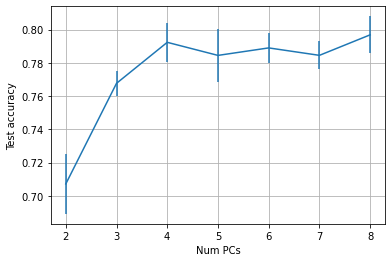

In [75]:
acc_mean = np.mean(acc, axis=1)
acc_se = np.std(acc, axis=1) / np.sqrt(nfold-1)
plt.errorbar(ncomp_test, acc_mean, yerr=acc_se)
plt.grid()
plt.xlabel('Num PCs')
plt.ylabel('Test accuracy')
im = np.argmax(acc_mean)
print('Optimal number of PCs (normal rule) = %d' % (ncomp_test[im]))
print('Best test accuracy = %7.4f' % acc_mean[im])
acc_tgt = acc_mean[im] - acc_se[im]
I = np.where(acc_mean >= acc_tgt)[0]
ise = I[0]
print('Optimal number of PCs (one SE) = %d' % (ncomp_test[ise]))
print('Best test accuracy = %7.4f' % acc_mean[ise])

In [76]:
scaling = StandardScaler()
scaling.fit(X_tr3)
Xtrs = scaling.transform(X_tr3)
pca = PCA(n_components=4)
pca.fit(Xtrs)
Ztr = pca.transform(Xtrs)
logreg = LogisticRegression(multi_class='ovr', solver='lbfgs')
logreg.fit(Ztr,y_tr)
Xtss = scaling.transform(X_ts3)
Zts = pca.transform(Xtss)
yhat = logreg.predict_proba(Zts)
ykk=logreg.predict(Zts)



In [77]:
print(pd.DataFrame(pca.components_,columns=df3.columns,index = ['PC-1','PC-2','PC-3','PC-4']))

        Pclass      Name       Sex       Age     SibSp     Parch      Fare  \
PC-1 -0.176250  0.445167 -0.428715 -0.255169  0.416771  0.456121  0.353919   
PC-2 -0.609015 -0.063373 -0.024385  0.472628 -0.254575 -0.134129  0.437714   
PC-3  0.052012 -0.500614  0.528885 -0.207962  0.383065  0.254356  0.229927   
PC-4 -0.143509 -0.138086  0.191307  0.406993  0.266149  0.285554  0.204531   

      Embarked  
PC-1  0.121866  
PC-2  0.355978  
PC-3  0.399263  
PC-4 -0.750923  


In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ykk,y_ts))

[[251  10]
 [ 15 142]]


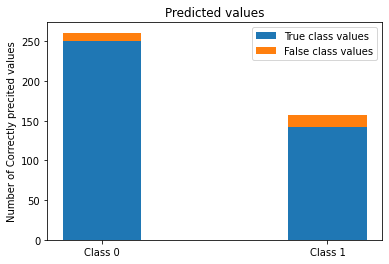

In [79]:

menMeans = (confusion_matrix(ykk,y_ts)[0][0],confusion_matrix(ykk,y_ts)[1][1])
womenMeans = (confusion_matrix(ykk,y_ts)[0][1],confusion_matrix(ykk,y_ts)[1][0])

ind = (0,1)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,width)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans)

plt.ylabel('Number of Correctly precited values')
plt.title('Predicted values')
plt.xticks(ind, ('Class 0', 'Class 1'))

plt.legend((p1[0], p2[0]), ('True class values', 'False class values'))

plt.show()



In [80]:
count=0
for i in range(418):
    if(ykk[i]==y_ts[i]):
       count+=1
print("Accuracy in %:",(count/418)*100)

Accuracy in %: 94.01913875598086


# Predict with dropped age missing values  datset

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
nfold = 5
kf = KFold(n_splits=nfold)
kf.get_n_splits(X_agetr1)
ncomp_test = np.arange(2,9)
num_nc = len(ncomp_test)
acc = np.zeros((num_nc,nfold))
for icomp, ncomp in enumerate(ncomp_test):
    for ifold, I in enumerate(kf.split(X_agetr1)):
        Itr, Its = I
        Xtr = X_agetr1[Itr]
        Xts = X_agetr1[Its]
        ytr = agetr1[Itr]
        yts = agetr1[Its]
        scaling = StandardScaler()
        scaling.fit(Xtr)
        Xtrs = scaling.transform(Xtr)
        pca = PCA(n_components=ncomp)
        pca.fit(Xtrs)
        Ztr = pca.transform(Xtrs)
        logreg = LogisticRegression(multi_class='ovr', solver='lbfgs')
        logreg.fit(Ztr,ytr)
        Xtss = scaling.transform(Xts)
        Zts = pca.transform(Xtss)
        yhat = logreg.predict(Zts)
        acc[icomp, ifold] = np.mean(yhat == yts)

Optimal number of PCs (normal rule) = 8
Best test accuracy =  0.7886
Optimal number of PCs (one SE) = 6
Best test accuracy =  0.7788


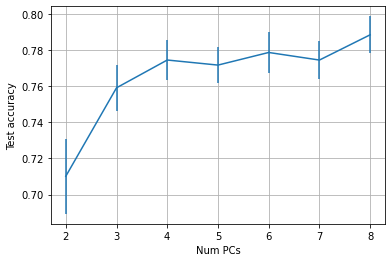

In [82]:
acc_mean = np.mean(acc, axis=1)
acc_se = np.std(acc, axis=1) / np.sqrt(nfold-1)
plt.errorbar(ncomp_test, acc_mean, yerr=acc_se)
plt.grid()
plt.xlabel('Num PCs')
plt.ylabel('Test accuracy')
im = np.argmax(acc_mean)
print('Optimal number of PCs (normal rule) = %d' % (ncomp_test[im]))
print('Best test accuracy = %7.4f' % acc_mean[im])
acc_tgt = acc_mean[im] - acc_se[im]
I = np.where(acc_mean >= acc_tgt)[0]
ise = I[0]
print('Optimal number of PCs (one SE) = %d' % (ncomp_test[ise]))
print('Best test accuracy = %7.4f' % acc_mean[ise])

In [83]:
scaling = StandardScaler()
scaling.fit(X_agetr1)
Xtrs = scaling.transform(X_agetr1)
pca = PCA(n_components=6)
pca.fit(Xtrs)
Ztr = pca.transform(Xtrs)
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(Ztr,agetr1)
Xtss = scaling.transform(X_ts3)
Zts = pca.transform(Xtss)
yhat = logreg.predict(Zts)
print(yhat.shape)
print(y_ts.shape)


(418,)
(418, 1)


In [84]:
print(pd.DataFrame(pca.components_,columns=df3.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6']))

        Pclass      Name       Sex       Age     SibSp     Parch      Fare  \
PC-1 -0.350066  0.410803 -0.430073 -0.099538  0.324015  0.390390  0.459191   
PC-2 -0.515557 -0.197396  0.080949  0.507873 -0.374224 -0.282788  0.321679   
PC-3 -0.052699  0.521687 -0.516996  0.191616 -0.387711 -0.274506 -0.285860   
PC-4 -0.170768 -0.059625  0.198402  0.493057  0.254399  0.276647  0.137874   
PC-5  0.246352 -0.403249 -0.417596  0.252322 -0.346998  0.621591 -0.128884   
PC-6 -0.031642 -0.344181 -0.217616 -0.499696 -0.323997 -0.140983  0.521184   

      Embarked  
PC-1  0.213488  
PC-2  0.327503  
PC-3 -0.337156  
PC-4 -0.724261  
PC-5  0.123502  
PC-6 -0.432438  


In [85]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yhat,y_ts))

[[249  10]
 [ 17 142]]


In [86]:
count=0
for i in range(418):
    if(yhat[i]==y_ts[i]):
       count+=1
print("Accuracy in %:",(count/418)*100)

Accuracy in %: 93.54066985645933


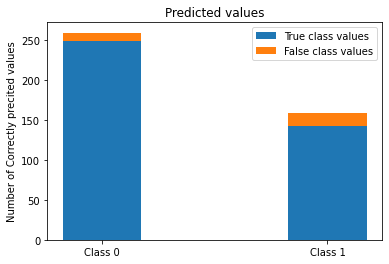

In [87]:

menMeans = (confusion_matrix(yhat,y_ts)[0][0],confusion_matrix(yhat,y_ts)[1][1])
womenMeans = (confusion_matrix(yhat,y_ts)[0][1],confusion_matrix(yhat,y_ts)[1][0])

ind = (0,1)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,width)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans)

plt.ylabel('Number of Correctly precited values')
plt.title('Predicted values')
plt.xticks(ind, ('Class 0', 'Class 1'))

plt.legend((p1[0], p2[0]), ('True class values', 'False class values'))

plt.show()


# Just by dropping age values we get lower accuracy and requires 6 principal components  where as  predicting age values before training,  just  requires 4 principal components and gives higher accuracy